# What's in a book:  Alice in Wonderland

The aim here is to produce a form of semantec network linking words together by dictionary synonyms, this will be done for every word in the book. We will use Alice in Wonderland as a sample text.

 

In [1]:
import re
from pprint import pprint
import json
from collections import Counter
from collections import defaultdict
from scipy.stats import pearsonr
import random

import matplotlib.pyplot as plt

## Loading Synonyms


In [28]:
def load_synonyms(obj):
    d = defaultdict(set)
    for result in obj['results']:
        word = result['id']
        for lex in result['lexicalEntries']:
            for entry in lex['entries']:
                for sense in entry['senses']:
                    for syn in sense['synonyms']:
                        if len(syn['text'].split()) > 1:
                            continue
                        if syn['text'] not in WORDS:
                            continue
                        d[word].add(syn['text'])
    return d

In [ ]:
G = {}
with open('data/synonym.nd.json') as fp:
    for row in json.loads(fp.read()):
        G.update(load_synonyms(row))

In [29]:
max(G, key=lambda k: len(G[k]))

'take'

In [31]:
counts = []
wordlen = []
index = {}
unique = set()
print(len(G.keys()))
for i, (k, v) in enumerate(G.items()):
    counts.append(len(v))
    wordlen.append(len(k))
    index[k] = i
    for w in v:
        unique.add(w) 
    unique.add(k)
print('unique', len(unique))

1190
unique 1486


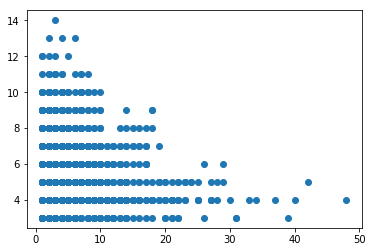

In [32]:
plt.scatter(counts, wordlen)

In [33]:
pearsonr(counts, wordlen)

(-0.26120168094153334, 5.1643614899467274e-20)

In [34]:
def index_node(n):
    if n not in indexes:
        indexes[n] = len(indexes)
    return indexes[n]

def write_graph(G)
    with open('data/edges.csv', 'w+') as fp:
        indexes = dict()
        for k, edges in G.items():
            ki = index_node(k)
            for v in edges:
                vi = index_node(v)
                fp.write(f'{ki},{vi}\n')
    with open('data/nodes.csv', 'w+') as fp:
        for k, v in indexes.items():
            fp.write(f'{v},{k}\n')
    with open('data/labeled_edges.csv', 'w+') as fp:
        fp.write('source,target\n')
        for k, edges in G.items():
            for v in edges:
                fp.write(f'{k},{v}\n')

In [35]:
with open('data/labeled_edges.csv', 'w+') as fp:
    fp.write('source,target\n')
    for k, edges in G.items():
        for v in edges:
            fp.write(f'{k},{v}\n')

Jon M. Kleinberg, Authoritative Sources in a Hyperlinked Environment, in Journal of the ACM 46 (5): 604–632 (1999)

## Measures of word similarity

* word vector model
* number of shared synonyms (needs dict but we should have that data)



To contextualise, this is perhaps referential to Lacan's ideas that meaning is produced through metonymically linked chain of signifiers--the metonymic refering to things that are closely linked but no not exactly refer to the same thing. Additionally, we might also cite Derrida's notion of différance, to refer to this way how meaning can be indefinitely refered.

Here insted of instead of using metonymically realated words, we will use the ns

In [36]:
def dfs(start, successors):
    frontier = [[start]]
    explored = set()
    longest = []
    while frontier:
        path = frontier.pop(0)
        longest = max([longest, path], key=len)
        for n in successors(path[-1]):
            if n in explored:
                continue
            explored.add(n)
            path2 = path + [n]
            frontier.append(path2)
    return longest
    
def successors(n): return G.get(n, [])

In [39]:
longest = []
paths = []
for k in G:
    path = dfs(k, successors)
    paths.append(path)
    longest = max([path, longest], key=len)
print(len(longest) - 1, longest)

12 ['sister', 'partner', 'wife', 'woman', 'girl', 'miss', 'skirt', 'line', 'back', 'old', 'once', 'ever', 'incessantly']
